## Coletar de dados

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
from math import log
 
# from matplotlib import pyplot as plt
# from ggplot import *
 
from sklearn.model_selection import train_test_split
import seaborn as sns
 
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource

 
# import plotly.plotly as py
import plotly.graph_objs as go

#Set date format
to_datetime = lambda d: datetime.strptime(d, '%d/%m/%Y')

#Define fields data type
df2019type = {'ANO_CONCESSAO_BOLSA': 'int64', 'CODIGO_EMEC_IES_BOLSA':'int64','NOME_IES_BOLSA': 'category', 'NOME_IES_BOLSA': 'category', 'NOME_IES_BOLSA': 'category','TIPO_BOLSA':'category','MODALIDADE_ENSINO_BOLSA':'category','NOME_CURSO_BOLSA':'category','NOME_TURNO_CURSO_BOLSA':'category','CPF_BENEFICIARIO_BOLSA':'category','SEXO_BENEFICIARIO_BOLSA':'category','RACA_BENEFICIARIO_BOLSA':'category','BENEFICIARIO_DEFICIENTE_FISICO':'category','REGIAO_BENEFICIARIO_BOLSA':'category','SIGLA_UF_BENEFICIARIO_BOLSA':'category','MUNICIPIO_BENEFICIARIO_BOLSA':'category','Código da IES':'category','Nome da IES':'category','Sigla da IES':'category','Organização Acadêmica':'category','Categoria Administrativa':'category','Município do Curso':'category','Sigla da UF':'category','Conceito Enade (Contínuo)': 'float64','Conceito Enade (Faixa)':'category'}

#Load data from csv files on github
df=pd.read_csv("https://raw.githubusercontent.com/godsavemenow/iesData/master/agregateddataenade2019.csv", dtype = df2019type, converters= {'DT_NASCIMENTO_BENEFICIARIO': to_datetime}, engine= 'python', delimiter=';', decimal = ',')

print(df.dtypes)
df.head()


ANO_CONCESSAO_BOLSA                        int64
CODIGO_EMEC_IES_BOLSA                      int64
NOME_IES_BOLSA                          category
TIPO_BOLSA                              category
MODALIDADE_ENSINO_BOLSA                 category
NOME_CURSO_BOLSA                        category
NOME_TURNO_CURSO_BOLSA                  category
CPF_BENEFICIARIO_BOLSA                  category
SEXO_BENEFICIARIO_BOLSA                 category
RACA_BENEFICIARIO_BOLSA                 category
DT_NASCIMENTO_BENEFICIARIO        datetime64[ns]
BENEFICIARIO_DEFICIENTE_FISICO          category
REGIAO_BENEFICIARIO_BOLSA               category
SIGLA_UF_BENEFICIARIO_BOLSA             category
MUNICIPIO_BENEFICIARIO_BOLSA            category
Código da IES                           category
Nome da IES                             category
Sigla da IES                            category
Organização Acadêmica                   category
Categoria Administrativa                category
Município do Curso  

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Município do Curso,Sigla da UF,Conceito Enade (Contínuo),Conceito Enade (Faixa)
0,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***03183970**,M,Branca,1993-08-19,N,Sul,PR,LONDRINA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4
1,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***92848904**,F,Branca,1999-11-03,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4
2,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***12457929**,M,Parda,1999-04-02,N,Sul,PR,QUATRO BARRAS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4
3,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***21386908**,M,Branca,2000-03-15,N,Sul,PR,CURITIBA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4
4,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***27405933**,M,Branca,1993-05-23,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4


## Realizar pré-processamento dos dados 





### – Definição de	tipos 
Essa etapa foi feita no bloco de código anterior, antes de subir os dados, pois fazê-lo depois consumiria muito da RAM da plataforma. Mas ainda iremos adiconar mais uma coluna aqui para saber a região das instituições, já que temos a região dos beneficiários, pode ser proveitosa essa informação. E setaremos mais um tipo categórico. Adicionaremos também uma coluna com a idade calculada.




In [ ]:
# Adicionando coluna REGIAO_IES
df['REGIAO_IES'] = 'null'


In [ ]:
#Mapeamento entre UF e Região
df.loc[(df['Sigla da UF'] == 'RS'),'REGIAO_IES'] = 'Sul'
df.loc[(df['Sigla da UF'] == 'PR'),'REGIAO_IES'] = 'Sul'
df.loc[(df['Sigla da UF'] == 'SC'),'REGIAO_IES'] = 'Sul'
df.loc[(df['Sigla da UF'] == 'SP'),'REGIAO_IES'] = 'Sudeste'
df.loc[(df['Sigla da UF'] == 'MG'),'REGIAO_IES'] = 'Sudeste'
df.loc[(df['Sigla da UF'] == 'RJ'),'REGIAO_IES'] = 'Sudeste'
df.loc[(df['Sigla da UF'] == 'ES'),'REGIAO_IES'] = 'Sudeste'
df.loc[(df['Sigla da UF'] == 'MT'),'REGIAO_IES'] = 'Centro-Oeste'
df.loc[(df['Sigla da UF'] == 'MS'),'REGIAO_IES'] = 'Centro-Oeste'
df.loc[(df['Sigla da UF'] == 'GO'),'REGIAO_IES'] = 'Centro-Oeste'
df.loc[(df['Sigla da UF'] == 'DF'),'REGIAO_IES'] = 'Centro-Oeste'
df.loc[(df['Sigla da UF'] == 'RR'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'AM'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'AC'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'RO'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'AP'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'TO'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'PA'),'REGIAO_IES'] = 'Norte'
df.loc[(df['Sigla da UF'] == 'BA'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'PE'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'RN'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'CE'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'AL'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'SE'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'PB'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'PI'),'REGIAO_IES'] = 'Nordeste'
df.loc[(df['Sigla da UF'] == 'MA'),'REGIAO_IES'] = 'Nordeste'

In [ ]:
# Definição de tipo da coluna REGIAO_IES
print(df['REGIAO_IES'].dtype)
df['REGIAO_IES'] =  df['REGIAO_IES'].astype('category')
print(df['REGIAO_IES'].dtype)

object
category


In [ ]:
# Adicionando coluna IDADE
df['IDADE'] = 'null'


In [ ]:
# Preenchimento dos dados de IDADE a partir da infomação de data de nascimento
df["IDADE"] = df["DT_NASCIMENTO_BENEFICIARIO"].apply(lambda x : (datetime.now().year - x.year))

In [ ]:
print(df['IDADE'].dtype)

int64


In [ ]:
print(df.dtypes)

ANO_CONCESSAO_BOLSA                        int64
CODIGO_EMEC_IES_BOLSA                      int64
NOME_IES_BOLSA                          category
TIPO_BOLSA                              category
MODALIDADE_ENSINO_BOLSA                 category
NOME_CURSO_BOLSA                        category
NOME_TURNO_CURSO_BOLSA                  category
CPF_BENEFICIARIO_BOLSA                  category
SEXO_BENEFICIARIO_BOLSA                 category
RACA_BENEFICIARIO_BOLSA                 category
DT_NASCIMENTO_BENEFICIARIO        datetime64[ns]
BENEFICIARIO_DEFICIENTE_FISICO          category
REGIAO_BENEFICIARIO_BOLSA               category
SIGLA_UF_BENEFICIARIO_BOLSA             category
MUNICIPIO_BENEFICIARIO_BOLSA            category
Código da IES                           category
Nome da IES                             category
Sigla da IES                            category
Organização Acadêmica                   category
Categoria Administrativa                category
Município do Curso  

In [ ]:
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Município do Curso,Sigla da UF,Conceito Enade (Contínuo),Conceito Enade (Faixa),REGIAO_IES,IDADE
0,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***03183970**,M,Branca,1993-08-19,N,Sul,PR,LONDRINA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,28
1,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***92848904**,F,Branca,1999-11-03,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,22
2,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***12457929**,M,Parda,1999-04-02,N,Sul,PR,QUATRO BARRAS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,22
3,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***21386908**,M,Branca,2000-03-15,N,Sul,PR,CURITIBA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,21
4,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***27405933**,M,Branca,1993-05-23,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4,Sul,28


Aqui temos a descrição de algumas das principais informações do dataset:

In [ ]:
# Por se tratar de um dado numérico temos informações como média, valor mínimo e máximo da coluna
df[['Conceito Enade (Contínuo)']].describe()

,Conceito Enade (Contínuo)
count,203859.000000
mean,2.006995
std,0.874992
min,0.000000
25%,1.561200
50%,1.701700
75%,2.503500
max,4.762700


In [ ]:
# o conceito enade (Faixa), atualmente é um dado categórico dado que, originalment, quando a coluna não tem o valor informado ela retorna um valor "SC" (sem conceito)
# trataremos esse caso de ausência em breve 
df[['Conceito Enade (Faixa)']].describe()

,Conceito Enade (Faixa)
count,209153
unique,6
top,2
freq,106355


In [ ]:
df['Conceito Enade (Faixa)'].unique()

['4', '3', '2', '5', NaN, '1', 'SC']
Categories (6, object): ['4', '3', '2', '5', '1', 'SC']

In [ ]:
#Algumas informações importantes começam a aparecer, como os mais frequentes modallidade de curso, turno e região dos alunos  do prouni 2019
df[['MODALIDADE_ENSINO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'REGIAO_BENEFICIARIO_BOLSA', 'REGIAO_IES','TIPO_BOLSA', 'Organização Acadêmica', 'Categoria Administrativa']].describe()

,MODALIDADE_ENSINO_BOLSA,NOME_TURNO_CURSO_BOLSA,REGIAO_BENEFICIARIO_BOLSA,REGIAO_IES,TIPO_BOLSA,Organização Acadêmica,Categoria Administrativa
count,225555,225555,225555,225555,225555,209153,209153
unique,2,5,5,6,2,3,2
top,Presencial,Noturno,Sudeste,Sudeste,BOLSA INTEGRAL,Universidade,Privada com fins lucrativos
freq,158305,105792,104102,108527,167807,97428,148005


In [ ]:
#Aqui vemos algumas informções importantes como o fato da maioria das vagas são dsponibilizadas em IES de São paulo (Sigla UF x top), assim como a maior parte 
#dos benefiários são do mesmo estado, em breve analisaremos interações entre os estados e entre regiões
df[['Sigla da UF','SIGLA_UF_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO']].describe()

,Sigla da UF,SIGLA_UF_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,BENEFICIARIO_DEFICIENTE_FISICO
count,209153,225555,225555,225555,225555
unique,27,27,6,2,2
top,SP,SP,Parda,F,N
freq,75227,59441,105705,131368,223931



### – Tratamento de dados ausentes 
 #### - Removendo instâncias



In [ ]:
df.shape

(225555, 26)

In [ ]:
print(df.isnull().sum())

ANO_CONCESSAO_BOLSA                   0
CODIGO_EMEC_IES_BOLSA                 0
NOME_IES_BOLSA                        0
TIPO_BOLSA                            0
MODALIDADE_ENSINO_BOLSA               0
NOME_CURSO_BOLSA                      0
NOME_TURNO_CURSO_BOLSA                0
CPF_BENEFICIARIO_BOLSA                0
SEXO_BENEFICIARIO_BOLSA               0
RACA_BENEFICIARIO_BOLSA               0
DT_NASCIMENTO_BENEFICIARIO            0
BENEFICIARIO_DEFICIENTE_FISICO        0
REGIAO_BENEFICIARIO_BOLSA             0
SIGLA_UF_BENEFICIARIO_BOLSA           0
MUNICIPIO_BENEFICIARIO_BOLSA          0
Código da IES                     16402
Nome da IES                       16402
Sigla da IES                      37989
Organização Acadêmica             16402
Categoria Administrativa          16402
Município do Curso                16402
Sigla da UF                       16402
Conceito Enade (Contínuo)         21696
Conceito Enade (Faixa)            16402
REGIAO_IES                            0


Iremos remover instâncias desses dados que não estão em MAIÚSCULO, pois é um dado que foi integrado, veio da base do ENADE para a do PROUNI, e já foi vinculado na integração as colunas existentes do PROUNI com as colunas do ENADE a partir do idenficador único (código IES - Instituição de Ensino Superior) da respectiva IES, como foi explicado acima **(Tópico Bônus).**
Cabe lembrar também que, diferentemente do ENADE que apanha todas as IES, o Programa Universidade para Todos (Prouni) do Ministério da Educação é um programa que oferece bolsas de estudo, integrais e parciais (50%), em *instituições particulares* de educação superior. E as linhas ai que estão sendo removidas, dizem respeito a instituicoes que não tiveram seus dados divulgados pelo enade no ano de 2019. Como podemos verificar abaixo:

In [ ]:

df['Conceito Enade (Faixa)'].values

['4', '4', '4', '4', '4', ..., NaN, NaN, NaN, NaN, NaN]
Length: 225555
Categories (6, object): ['1', '2', '3', '4', '5', 'SC']

In [ ]:
df['Conceito Enade (Contínuo)'].values

array([3.6396, 3.6396, 3.6396, ...,    nan,    nan,    nan])

In [ ]:
#remove colunas com até 15% de dados ausentes
df = df.dropna(thresh=0.85*len(df), axis=1)
#Substituimos os valores assinalados como 'SC'
df['Conceito Enade (Faixa)'] = df['Conceito Enade (Faixa)'].replace(['SC'],np.nan)

In [ ]:
df['Conceito Enade (Faixa)'].unique()

['4', '3', '2', '5', NaN, '1']
Categories (5, object): ['4', '3', '2', '5', '1']

In [ ]:
df['Conceito Enade (Contínuo)'].unique()

array([3.6396, 2.8074, 3.026 , 2.2965, 2.2256, 1.77  , 2.6857, 2.2156,
       3.4516, 4.1814, 2.6108, 1.9031, 2.6897, 3.0004, 2.1144, 2.9288,
       1.989 , 1.1111, 1.8957, 3.2826, 1.7462, 1.8592,    nan, 2.6482,
       2.463 , 1.99  , 2.0502, 0.    , 2.357 , 2.0388, 2.5636, 2.4562,
       1.5019, 2.4204, 1.5677, 2.5344, 2.0085, 2.0807, 2.7916, 1.8503,
       2.484 , 2.0617, 1.7824, 0.8911, 2.1316, 2.0783, 2.3737, 0.8809,
       3.1309, 2.179 , 1.2065, 2.4417, 1.8271, 1.5155, 0.2472, 1.6186,
       3.1868, 3.0752, 1.6105, 2.2336, 3.9306, 2.5715, 2.282 , 2.3608,
       1.6071, 2.0201, 1.7164, 2.3667, 1.2856, 3.1285, 1.5314, 2.4526,
       0.3388, 2.7182, 2.381 , 2.7431, 0.7029, 3.5703, 1.8054, 2.2031,
       1.9574, 2.4277, 2.5001, 2.2586, 1.7002, 0.5549, 2.1003, 1.9095,
       1.0948, 1.4493, 1.5475, 2.1393, 1.732 , 2.4739, 2.1836, 3.2675,
       1.2434, 2.9674, 3.063 , 1.185 , 1.4548, 2.2641, 2.4814, 2.0186,
       2.278 , 1.4597, 2.0268, 2.3665, 2.8994, 2.3563, 2.275 , 1.6869,
      

In [ ]:
#Agora podemos alterar o tipo do dado para float
print(df['Conceito Enade (Faixa)'].dtype)
df['Conceito Enade (Faixa)'] =  df['Conceito Enade (Faixa)'].astype('float64')
print(df['Conceito Enade (Faixa)'].dtype)

category
float64


In [ ]:
df['Conceito Enade (Faixa)'].describe()

count    203859.000000
mean          2.508778
std           0.872058
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: Conceito Enade (Faixa), dtype: float64

### - Imputação e remoção de dados ausentes
Decidimos fazer a imputação de acordo com a mediana, pois tinhamos várias instituições sem o dado de Conceito Enade e desta forma percebemos uma pequena diferença na média geral após aplicação.

In [ ]:
df['Conceito Enade (Faixa)'].fillna(df['Conceito Enade (Faixa)'].median(), inplace=True)
df['Conceito Enade (Contínuo)'].fillna(df['Conceito Enade (Contínuo)'].median(), inplace=True)

In [ ]:
df['Conceito Enade (Faixa)'].describe()

count    225555.000000
mean          2.459839
std           0.842519
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: Conceito Enade (Faixa), dtype: float64

In [ ]:
df['Conceito Enade (Faixa)'].unique()

array([4., 3., 2., 5., 1.])

In [ ]:
#Ja temos os dados que foram integrados completos, os dados faltantes do ProUni sobre ENADE, sao cerca de 16 mil, dos +220 mil. Nesse caso, optaremos por removê-los.
print(df.isnull().sum())
#remove
df = df.dropna()

ANO_CONCESSAO_BOLSA                   0
CODIGO_EMEC_IES_BOLSA                 0
NOME_IES_BOLSA                        0
TIPO_BOLSA                            0
MODALIDADE_ENSINO_BOLSA               0
NOME_CURSO_BOLSA                      0
NOME_TURNO_CURSO_BOLSA                0
CPF_BENEFICIARIO_BOLSA                0
SEXO_BENEFICIARIO_BOLSA               0
RACA_BENEFICIARIO_BOLSA               0
DT_NASCIMENTO_BENEFICIARIO            0
BENEFICIARIO_DEFICIENTE_FISICO        0
REGIAO_BENEFICIARIO_BOLSA             0
SIGLA_UF_BENEFICIARIO_BOLSA           0
MUNICIPIO_BENEFICIARIO_BOLSA          0
Código da IES                     16402
Nome da IES                       16402
Organização Acadêmica             16402
Categoria Administrativa          16402
Município do Curso                16402
Sigla da UF                       16402
Conceito Enade (Contínuo)             0
Conceito Enade (Faixa)                0
REGIAO_IES                            0
IDADE                                 0


In [ ]:
#verifica sem ainda tem algum dado ausente em ao menos 1 coluna
print(df.isnull().sum())

ANO_CONCESSAO_BOLSA               0
CODIGO_EMEC_IES_BOLSA             0
NOME_IES_BOLSA                    0
TIPO_BOLSA                        0
MODALIDADE_ENSINO_BOLSA           0
NOME_CURSO_BOLSA                  0
NOME_TURNO_CURSO_BOLSA            0
CPF_BENEFICIARIO_BOLSA            0
SEXO_BENEFICIARIO_BOLSA           0
RACA_BENEFICIARIO_BOLSA           0
DT_NASCIMENTO_BENEFICIARIO        0
BENEFICIARIO_DEFICIENTE_FISICO    0
REGIAO_BENEFICIARIO_BOLSA         0
SIGLA_UF_BENEFICIARIO_BOLSA       0
MUNICIPIO_BENEFICIARIO_BOLSA      0
Código da IES                     0
Nome da IES                       0
Organização Acadêmica             0
Categoria Administrativa          0
Município do Curso                0
Sigla da UF                       0
Conceito Enade (Contínuo)         0
Conceito Enade (Faixa)            0
REGIAO_IES                        0
IDADE                             0
dtype: int64


### – Normalização 
#### Faremos uma normalização, entre 0 e 1, nos dados correspondentes a conceito enade: Conceito Enade (Contínuo) e Conceito Enade (Faixa), para estabelecer uma escala comum.




In [ ]:
# normalizando entre 0 e 1
df['Conceito Enade (Contínuo) - normalizado'] = (df['Conceito Enade (Contínuo)'] - df['Conceito Enade (Contínuo)'].min()) / (df['Conceito Enade (Contínuo)'].max() - df['Conceito Enade (Contínuo)'].min())
df['Conceito Enade (Faixa) - normalizado'] = (df['Conceito Enade (Faixa)'] - df['Conceito Enade (Faixa)'].min()) / (df['Conceito Enade (Faixa)'].max() - df['Conceito Enade (Faixa)'].min())
df.head()


,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,Código da IES,Nome da IES,Organização Acadêmica,Categoria Administrativa,Município do Curso,Sigla da UF,Conceito Enade (Contínuo),Conceito Enade (Faixa),REGIAO_IES,IDADE,Conceito Enade (Contínuo) - normalizado,Conceito Enade (Faixa) - normalizado
0,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***03183970**,M,Branca,1993-08-19,N,Sul,PR,LONDRINA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,28,0.764188,0.75
1,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Administração,Curso a distância,***92848904**,F,Branca,1999-11-03,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,22,0.764188,0.75
2,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***12457929**,M,Parda,1999-04-02,N,Sul,PR,QUATRO BARRAS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,22,0.764188,0.75
3,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***21386908**,M,Branca,2000-03-15,N,Sul,PR,CURITIBA,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,21,0.764188,0.75
4,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,Análise E Desenvolvimento De Sistemas,Curso a distância,***27405933**,M,Branca,1993-05-23,N,Sul,PR,SAO JOSE DOS PINHAIS,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,Universidade,Privada sem fins lucrativos,Curitiba,PR,3.6396,4.0,Sul,28,0.764188,0.75


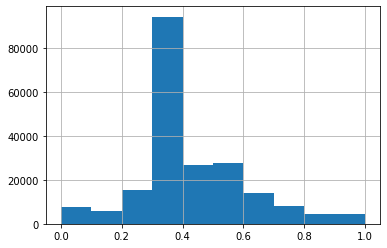

In [ ]:
df['Conceito Enade (Contínuo) - normalizado'].hist()

In [ ]:
df['Conceito Enade (Contínuo) - normalizado'].describe()

count    209153.000000
mean          0.419776
std           0.181657
min           0.000000
25%           0.327797
50%           0.357297
75%           0.519810
max           1.000000
Name: Conceito Enade (Contínuo) - normalizado, dtype: float64

In [ ]:
df['Conceito Enade (Contínuo) - normalizado'].mode()

0    0.339849
dtype: float64

In [ ]:
df['Conceito Enade (Contínuo) - normalizado'].unique()

array([0.76418838, 0.58945556, 0.6353539 , 0.48218448, 0.46729796,
       0.37163794, 0.56390283, 0.46519831, 0.72471497, 0.87794738,
       0.54817645, 0.39958427, 0.56474269, 0.62997879, 0.44394986,
       0.6149453 , 0.41762026, 0.23329204, 0.39803053, 0.6892309 ,
       0.36664077, 0.39036681, 0.55602914, 0.51714364, 0.41783022,
       0.43047011, 0.        , 0.49488735, 0.42807651, 0.53826611,
       0.51571588, 0.31534634, 0.50819913, 0.32916203, 0.53213513,
       0.42171457, 0.43687404, 0.58613811, 0.38849812, 0.5215529 ,
       0.43288471, 0.3742415 , 0.18709975, 0.44756126, 0.43637013,
       0.49839377, 0.18495811, 0.65737922, 0.4575136 , 0.2533227 ,
       0.51267138, 0.38362693, 0.31820186, 0.05190333, 0.33984925,
       0.66911626, 0.64568417, 0.33814853, 0.46897768, 0.82528818,
       0.53992483, 0.47913998, 0.49568522, 0.35729733, 0.33743465,
       0.42415017, 0.36038382, 0.49692401, 0.26993092, 0.6568753 ,
       0.3215403 , 0.51496   , 0.07113612, 0.57072669, 0.49992

In [ ]:
df[['Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)', 'IDADE']].describe()
#Essas sao as colunas que podemos fazer consultas sobre dados numéricos

,Conceito Enade (Contínuo),Conceito Enade (Faixa),IDADE
count,209153.000000,209153.000000,209153.000000
mean,1.999268,2.495900,25.368701
std,0.865177,0.864652,6.731031
min,0.000000,1.000000,13.000000
25%,1.561200,2.000000,21.000000
50%,1.701700,2.000000,23.000000
75%,2.475700,3.000000,27.000000
max,4.762700,5.000000,78.000000


In [ ]:
#Fazemos uma contagem em relação ao nome do curso da bolsa, especialmente porque queremos saber 
#a totalização de algumas colunas por curso, como cpf, que vai nos informar o total pessoas por 
#curso, por exemplo
GROUPED_BY_NOME_CURSO_BOLSA=df.groupby('NOME_CURSO_BOLSA').count()
GROUPED_BY_NOME_CURSO_BOLSA

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,Código da IES,Nome da IES,Organização Acadêmica,Categoria Administrativa,Município do Curso,Sigla da UF,Conceito Enade (Contínuo),Conceito Enade (Faixa),REGIAO_IES,IDADE,Conceito Enade (Contínuo) - normalizado,Conceito Enade (Faixa) - normalizado
NOME_CURSO_BOLSA,,,,,,,,,,,,,,,,,,,,,,,,,,
Tradução E Interpretação,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Engenharia Aeronáutica E Espaço,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Engenharia Biomédica,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Engenharia Civil E Ambiental,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Engenharia De Automação E Sistemas,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Visagismo E Terapias Capilares,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Viticultura E Enologia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Web Design,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [ ]:
# Qual a média e a mediana do conceito enade por estado no brasil?
GROUPED_BY_UF=df.groupby('Sigla da UF').agg(['mean','median'])['Conceito Enade (Faixa)']
GROUPED_BY_UF

,mean,median
Sigla da UF,,
AC,2.210341,2.0
AL,1.912424,2.0
AM,3.026581,3.0
AP,1.804845,2.0
BA,2.482867,3.0
CE,2.678988,3.0
DF,2.828947,3.0
ES,3.304962,4.0
GO,2.376994,2.0


In [ ]:
#Qual estados tem a maior e menor média de idade de alunos no prouni?
GROUPED_BY_UF_AGE=df.groupby('Sigla da UF').agg(['mean','median'])['IDADE']
GROUPED_BY_UF_AGE

,mean,median
Sigla da UF,,
AC,24.567568,23
AL,24.421589,23
AM,24.764398,23
AP,24.806191,22
BA,25.019850,23
CE,23.435376,22
DF,24.237229,22
ES,23.818544,22
GO,23.945706,22


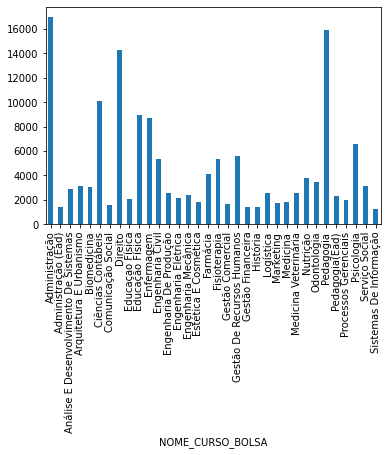

In [ ]:
# Cursos que tiveram mais de 1200 beneficiarios.
GROUPED_BY_NOME_CURSO_BOLSA[GROUPED_BY_NOME_CURSO_BOLSA['CPF_BENEFICIARIO_BOLSA'] > 1200]['NOME_IES_BOLSA'].plot.bar(x='NOME_CURSO_BOLSA', stacked=True)

# Parte 2 - PROJETO




## • 1.  Escolher uma das colunas dos dados utilizados no projeto 1 para predição (classificação ou regressão) 
R: Classificação (Predizer Raça/Conceito Enade(Faixa))


 ## • 2.  Separar os dados em treinamento, validação e teste 

 

In [ ]:
df['NOME_IES_BOLSA'] = df['NOME_IES_BOLSA'].cat.codes                                
df['TIPO_BOLSA'] = df['TIPO_BOLSA'].cat.codes                                  
df['MODALIDADE_ENSINO_BOLSA'] = df['MODALIDADE_ENSINO_BOLSA'].cat.codes                      
df['NOME_CURSO_BOLSA'] = df['NOME_CURSO_BOLSA'].cat.codes                              
df['NOME_TURNO_CURSO_BOLSA'] = df['NOME_TURNO_CURSO_BOLSA'].cat.codes                          
df = df.drop('CPF_BENEFICIARIO_BOLSA', axis = 1)                        
df['SEXO_BENEFICIARIO_BOLSA'] = df['SEXO_BENEFICIARIO_BOLSA'].cat.codes                      
df['RACA_BENEFICIARIO_BOLSA'] = df['RACA_BENEFICIARIO_BOLSA'].cat.codes                        
df['BENEFICIARIO_DEFICIENTE_FISICO'] = df['BENEFICIARIO_DEFICIENTE_FISICO'].cat.codes                  
df['REGIAO_BENEFICIARIO_BOLSA'] = df['REGIAO_BENEFICIARIO_BOLSA'].cat.codes                       
df['SIGLA_UF_BENEFICIARIO_BOLSA'] = df['SIGLA_UF_BENEFICIARIO_BOLSA'].cat.codes                     
df['MUNICIPIO_BENEFICIARIO_BOLSA'] = df['MUNICIPIO_BENEFICIARIO_BOLSA'].cat.codes
df['Código da IES'] = df['Código da IES'].cat.codes            
df = df.drop('Nome da IES', axis = 1)                                            
df['Organização Acadêmica'] = df['Organização Acadêmica'].cat.codes                          
df['Categoria Administrativa'] = df['Categoria Administrativa'].cat.codes
df['Município do Curso'] = df['Município do Curso'].cat.codes                              
df['Sigla da UF'] = df['Sigla da UF'].cat.codes                                
df['REGIAO_IES'] = df['REGIAO_IES'].cat.codes
df = df.drop('DT_NASCIMENTO_BENEFICIARIO', axis=1)  
X_df = df.drop('RACA_BENEFICIARIO_BOLSA', axis=1)
y_df = df['RACA_BENEFICIARIO_BOLSA']  

In [ ]:
#Divisão de dados
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, random_state=1, test_size=0.5)
Xtest, Xval, ytest, Yval = train_test_split(Xtest, ytest, random_state=1, test_size=0.5)
print(Xtrain.shape, Xtest.shape, Xval.shape)

(104576, 23) (52288, 23) (52289, 23)


## • 3.  Selecionar 4 algoritmos de acordo com a tarefa escolhida 
no passo 1 
R: Naïve bayes, SVM (SMO), Logistic regression (logistic), Multilayer perceptron 


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

!pip install --quiet optuna
import optuna
!pip install --quiet mlflow
import mlflow
!pip install --quiet pyngrok 
from pyngrok import ngrok 

from optuna.integration.mlflow import MLflowCallback
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## • 4.  Adicionar MLFlow no treinamento dos modelos para rastreamento 


### 4.1 Função de avaliar métricas 

In [ ]:
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    f1score = f1_score(actual, pred, average='micro')
    recallscore = recall_score(actual, pred, average='weighted')
    precisionscore = precision_score(actual, pred, average='micro')
    return accuracy, f1score, recallscore, precisionscore
    # Nos modelos abaixo usaremos essa funcao

### 4.2 MLflow Tracking UI


In [ ]:
# Cria MLflow Tracking UI e cria um tunel virtual para visualizar o rastreamento
# nos modelos abaixo estará a implementação do MLFlow em cada modelo.
get_ipython().system_raw("mlflow ui --port 5000 &") 
ngrok.kill()
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://06f32c8d1931.ngrok.io


## • 5.  Executar uma ferramenta de seleção de hiper-parâmetros sobre o conjunto de validação 






###  5.1. Selecionar poucos hiper-parâmetros por algoritmo (max. 3) 

Inicialmente criamos os modelos e rastreamos no MLflow com os dados de trainemanto, predizemos com os dados de validação.
Ao selecionar o melhor hiper-parametro, predizemos então com os dados de teste.

### Naive Bayes

In [ ]:
def gaussianNBayes(trial):

    var_smoothing = trial.suggest_float('var_smoothing', 1e-11, 1e-8)

    with mlflow.start_run(run_name = str('gaussianNBayes')):
      model = GaussianNB(var_smoothing = var_smoothing)                 
      model.fit(Xtrain, ytrain)    
      y_model = model.predict(Xval)             
    
      (accuracy, f1score, recallscore, precisionscore) = eval_metrics(Yval, y_model)

      print("GaussianNB model (var_smoothing=%f):" % (var_smoothing))
      print("accuracy: %s" % accuracy)
      print("f1 score: %s" % f1score)
      print("recall score: %s" % recallscore)
      print("precision score: %s" % precisionscore)

      mlflow.log_param("var_smoothing", var_smoothing)
      mlflow.log_metric("accuracy", accuracy)
      mlflow.log_metric("f1 score", f1score)
      mlflow.log_metric("recall score", recallscore)
      mlflow.log_metric("precision score", precisionscore)
      
      mlflow.end_run()

    return accuracy

In [ ]:
estudoNB = optuna.create_study(direction="maximize")
estudoNB.optimize(gaussianNBayes, n_trials=20)

[I 2021-04-22 21:05:44,997] A new study created in memory with name: no-name-6b574674-05ad-469d-a54c-b2b88ef97920
[I 2021-04-22 21:05:45,213] Trial 0 finished with value: 0.5627761096980245 and parameters: {'var_smoothing': 7.720459728169005e-09}. Best is trial 0 with value: 0.5627761096980245.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5627761096980245
f1 score: 0.5627761096980245
recall score: 0.5627761096980245
precision score: 0.5627761096980245


[I 2021-04-22 21:05:45,422] Trial 1 finished with value: 0.5626613628105338 and parameters: {'var_smoothing': 9.50571020328286e-09}. Best is trial 0 with value: 0.5627761096980245.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5626613628105338
f1 score: 0.5626613628105338
recall score: 0.5626613628105338
precision score: 0.5626613628105338


[I 2021-04-22 21:05:45,635] Trial 2 finished with value: 0.5624509935168008 and parameters: {'var_smoothing': 5.259539150107602e-09}. Best is trial 0 with value: 0.5627761096980245.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5624509935168008
f1 score: 0.5624509935168008
recall score: 0.5624509935168008
precision score: 0.5624509935168008


[I 2021-04-22 21:05:45,857] Trial 3 finished with value: 0.5610740308669128 and parameters: {'var_smoothing': 4.220857268189255e-09}. Best is trial 0 with value: 0.5627761096980245.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5610740308669128
f1 score: 0.5610740308669128
recall score: 0.5610740308669128
precision score: 0.5610740308669128


[I 2021-04-22 21:05:46,071] Trial 4 finished with value: 0.5623362466293101 and parameters: {'var_smoothing': 5.1274223402830225e-09}. Best is trial 0 with value: 0.5627761096980245.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5623362466293101
f1 score: 0.5623362466293101
recall score: 0.5623362466293101
precision score: 0.5623362466293101


[I 2021-04-22 21:05:46,287] Trial 5 finished with value: 0.5623744955918071 and parameters: {'var_smoothing': 5.213223789329657e-09}. Best is trial 0 with value: 0.5627761096980245.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5623744955918071
f1 score: 0.5623744955918071
recall score: 0.5623744955918071
precision score: 0.5623744955918071


[I 2021-04-22 21:05:46,501] Trial 6 finished with value: 0.5589703379295836 and parameters: {'var_smoothing': 2.2074797076638828e-09}. Best is trial 0 with value: 0.5627761096980245.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5589703379295836
f1 score: 0.5589703379295836
recall score: 0.5589703379295836
precision score: 0.5589703379295836


[I 2021-04-22 21:05:46,728] Trial 7 finished with value: 0.5619920059668382 and parameters: {'var_smoothing': 4.892821707023128e-09}. Best is trial 0 with value: 0.5627761096980245.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5619920059668382
f1 score: 0.5619920059668382
recall score: 0.5619920059668382
precision score: 0.5619920059668382


[I 2021-04-22 21:05:46,940] Trial 8 finished with value: 0.5592954541108073 and parameters: {'var_smoothing': 1.7731934501066619e-09}. Best is trial 0 with value: 0.5627761096980245.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5592954541108073
f1 score: 0.5592954541108073
recall score: 0.5592954541108072
precision score: 0.5592954541108073


[I 2021-04-22 21:05:47,153] Trial 9 finished with value: 0.5628143586605213 and parameters: {'var_smoothing': 7.997191299171968e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5628143586605213
f1 score: 0.5628143586605213
recall score: 0.5628143586605213
precision score: 0.5628143586605213


[I 2021-04-22 21:05:47,372] Trial 10 finished with value: 0.5624509935168008 and parameters: {'var_smoothing': 9.637709079952601e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5624509935168008
f1 score: 0.5624509935168008
recall score: 0.5624509935168008
precision score: 0.5624509935168008


[I 2021-04-22 21:05:47,587] Trial 11 finished with value: 0.5627761096980245 and parameters: {'var_smoothing': 7.471822200117245e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5627761096980245
f1 score: 0.5627761096980245
recall score: 0.5627761096980245
precision score: 0.5627761096980245


[I 2021-04-22 21:05:47,811] Trial 12 finished with value: 0.5627952341792729 and parameters: {'var_smoothing': 7.635882643748688e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5627952341792729
f1 score: 0.5627952341792729
recall score: 0.5627952341792729
precision score: 0.5627952341792729


[I 2021-04-22 21:05:48,034] Trial 13 finished with value: 0.5627952341792729 and parameters: {'var_smoothing': 7.482550197543277e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5627952341792729
f1 score: 0.5627952341792729
recall score: 0.5627952341792729
precision score: 0.5627952341792729


[I 2021-04-22 21:05:48,252] Trial 14 finished with value: 0.5627761096980245 and parameters: {'var_smoothing': 8.827702116324531e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5627761096980245
f1 score: 0.5627761096980245
recall score: 0.5627761096980245
precision score: 0.5627761096980245


[I 2021-04-22 21:05:48,471] Trial 15 finished with value: 0.5626231138480369 and parameters: {'var_smoothing': 6.594641760692581e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5626231138480369
f1 score: 0.5626231138480369
recall score: 0.5626231138480369
precision score: 0.5626231138480369


[I 2021-04-22 21:05:48,701] Trial 16 finished with value: 0.5628143586605213 and parameters: {'var_smoothing': 8.697042213132121e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5628143586605213
f1 score: 0.5628143586605213
recall score: 0.5628143586605213
precision score: 0.5628143586605213


[I 2021-04-22 21:05:48,915] Trial 17 finished with value: 0.555853047486087 and parameters: {'var_smoothing': 1.9465676950957838e-10}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.555853047486087
f1 score: 0.555853047486087
recall score: 0.555853047486087
precision score: 0.555853047486087


[I 2021-04-22 21:05:49,143] Trial 18 finished with value: 0.5627761096980245 and parameters: {'var_smoothing': 8.848037242459538e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5627761096980245
f1 score: 0.5627761096980245
recall score: 0.5627761096980245
precision score: 0.5627761096980245


[I 2021-04-22 21:05:49,357] Trial 19 finished with value: 0.5626613628105338 and parameters: {'var_smoothing': 6.4488952471892346e-09}. Best is trial 9 with value: 0.5628143586605213.


GaussianNB model (var_smoothing=0.000000):
accuracy: 0.5626613628105338
f1 score: 0.5626613628105338
recall score: 0.5626613628105338
precision score: 0.5626613628105338


### Multilayer Perceptron

In [ ]:
def mPerceptron(trial):
    lr = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    #solver = trial.suggest_categorical('solver',['lbfgs', 'sgd', 'adam'])
    max_iter = trial.suggest_int('max_iter', 200, 300, 50)

    with mlflow.start_run(run_name = str('LogisticRegression')):

      model = MLPClassifier(max_iter=max_iter, learning_rate=lr, random_state = 1)
      model.fit(Xtrain, ytrain)
      y_pred = model.predict(Xval)

      (accuracy, f1score, recallscore, precisionscore) = eval_metrics(Yval, y_pred)

      print("mPerceptron model (lr=%s):" % (lr))
      print("mPerceptron model (max_iter=%f):" % (max_iter))

      print("accuracy: %s" % accuracy)
      print("f1 score: %s" % f1score)
      print("recall score: %s" % recallscore)
      print("precision score: %s" % precisionscore)

      mlflow.log_param("lr", lr)
      mlflow.log_param("max_iter", max_iter)

      mlflow.log_metric("accuracy", accuracy)
      mlflow.log_metric("f1 score", f1score)
      mlflow.log_metric("recall score", recallscore)
      mlflow.log_metric("precision score", precisionscore)

      mlflow.end_run()

      return accuracy
    #49,31

In [ ]:
estudompc = optuna.create_study(direction="maximize")
estudompc.optimize(mPerceptron, n_trials=20)

[I 2021-04-23 01:07:01,486] A new study created in memory with name: no-name-0215218b-f014-4866-9eb6-5b1676f1859d
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-04-23 01:10:54,539] Trial 0 finished with value: 0.576603109640651 and parameters: {'learning_rate': 'adaptive', 'max_iter': 200}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=adaptive):
mPerceptron model (max_iter=200.000000):
accuracy: 0.576603109640651
f1 score: 0.576603109640651
recall score: 0.576603109640651
precision score: 0.576603109640651


[I 2021-04-23 01:15:31,679] Trial 1 finished with value: 0.571114383522347 and parameters: {'learning_rate': 'constant', 'max_iter': 300}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=constant):
mPerceptron model (max_iter=300.000000):
accuracy: 0.571114383522347
f1 score: 0.571114383522347
recall score: 0.571114383522347
precision score: 0.571114383522347


[I 2021-04-23 01:20:09,116] Trial 2 finished with value: 0.571114383522347 and parameters: {'learning_rate': 'invscaling', 'max_iter': 300}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=invscaling):
mPerceptron model (max_iter=300.000000):
accuracy: 0.571114383522347
f1 score: 0.571114383522347
recall score: 0.571114383522347
precision score: 0.571114383522347


[I 2021-04-23 01:24:48,868] Trial 3 finished with value: 0.571114383522347 and parameters: {'learning_rate': 'invscaling', 'max_iter': 300}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=invscaling):
mPerceptron model (max_iter=300.000000):
accuracy: 0.571114383522347
f1 score: 0.571114383522347
recall score: 0.571114383522347
precision score: 0.571114383522347


[I 2021-04-23 01:29:28,732] Trial 4 finished with value: 0.571114383522347 and parameters: {'learning_rate': 'constant', 'max_iter': 300}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=constant):
mPerceptron model (max_iter=300.000000):
accuracy: 0.571114383522347
f1 score: 0.571114383522347
recall score: 0.571114383522347
precision score: 0.571114383522347


[I 2021-04-23 01:34:04,549] Trial 5 finished with value: 0.571114383522347 and parameters: {'learning_rate': 'adaptive', 'max_iter': 300}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=adaptive):
mPerceptron model (max_iter=300.000000):
accuracy: 0.571114383522347
f1 score: 0.571114383522347
recall score: 0.571114383522347
precision score: 0.571114383522347


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-04-23 01:37:54,275] Trial 6 finished with value: 0.576603109640651 and parameters: {'learning_rate': 'invscaling', 'max_iter': 200}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=invscaling):
mPerceptron model (max_iter=200.000000):
accuracy: 0.576603109640651
f1 score: 0.576603109640651
recall score: 0.576603109640651
precision score: 0.576603109640651


[I 2021-04-23 01:42:27,681] Trial 7 finished with value: 0.571114383522347 and parameters: {'learning_rate': 'constant', 'max_iter': 250}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=constant):
mPerceptron model (max_iter=250.000000):
accuracy: 0.571114383522347
f1 score: 0.571114383522347
recall score: 0.571114383522347
precision score: 0.571114383522347


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-04-23 01:46:14,442] Trial 8 finished with value: 0.576603109640651 and parameters: {'learning_rate': 'constant', 'max_iter': 200}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=constant):
mPerceptron model (max_iter=200.000000):
accuracy: 0.576603109640651
f1 score: 0.576603109640651
recall score: 0.576603109640651
precision score: 0.576603109640651


[I 2021-04-23 01:50:44,895] Trial 9 finished with value: 0.571114383522347 and parameters: {'learning_rate': 'constant', 'max_iter': 300}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=constant):
mPerceptron model (max_iter=300.000000):
accuracy: 0.571114383522347
f1 score: 0.571114383522347
recall score: 0.571114383522347
precision score: 0.571114383522347


[I 2021-04-23 01:55:16,468] Trial 10 finished with value: 0.571114383522347 and parameters: {'learning_rate': 'adaptive', 'max_iter': 250}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=adaptive):
mPerceptron model (max_iter=250.000000):
accuracy: 0.571114383522347
f1 score: 0.571114383522347
recall score: 0.571114383522347
precision score: 0.571114383522347


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-04-23 01:59:03,857] Trial 11 finished with value: 0.576603109640651 and parameters: {'learning_rate': 'invscaling', 'max_iter': 200}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=invscaling):
mPerceptron model (max_iter=200.000000):
accuracy: 0.576603109640651
f1 score: 0.576603109640651
recall score: 0.576603109640651
precision score: 0.576603109640651


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-04-23 02:02:56,490] Trial 12 finished with value: 0.576603109640651 and parameters: {'learning_rate': 'adaptive', 'max_iter': 200}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=adaptive):
mPerceptron model (max_iter=200.000000):
accuracy: 0.576603109640651
f1 score: 0.576603109640651
recall score: 0.576603109640651
precision score: 0.576603109640651


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-04-23 02:06:47,052] Trial 13 finished with value: 0.576603109640651 and parameters: {'learning_rate': 'invscaling', 'max_iter': 200}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=invscaling):
mPerceptron model (max_iter=200.000000):
accuracy: 0.576603109640651
f1 score: 0.576603109640651
recall score: 0.576603109640651
precision score: 0.576603109640651


[I 2021-04-23 02:11:21,386] Trial 14 finished with value: 0.571114383522347 and parameters: {'learning_rate': 'adaptive', 'max_iter': 250}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=adaptive):
mPerceptron model (max_iter=250.000000):
accuracy: 0.571114383522347
f1 score: 0.571114383522347
recall score: 0.571114383522347
precision score: 0.571114383522347


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-04-23 02:15:08,497] Trial 15 finished with value: 0.576603109640651 and parameters: {'learning_rate': 'invscaling', 'max_iter': 200}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=invscaling):
mPerceptron model (max_iter=200.000000):
accuracy: 0.576603109640651
f1 score: 0.576603109640651
recall score: 0.576603109640651
precision score: 0.576603109640651


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-04-23 02:18:56,439] Trial 16 finished with value: 0.576603109640651 and parameters: {'learning_rate': 'adaptive', 'max_iter': 200}. Best is trial 0 with value: 0.576603109640651.


mPerceptron model (lr=adaptive):
mPerceptron model (max_iter=200.000000):
accuracy: 0.576603109640651
f1 score: 0.576603109640651
recall score: 0.576603109640651
precision score: 0.576603109640651


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.



KeyboardInterrupt: ignored

###SVC

In [ ]:
def svmSvc(trial):

    c = trial.suggest_int('c', 1, 101, 10)
    max_iter = trial.suggest_int('max_iter', 1, 101, 10)

    with mlflow.start_run(run_name = str('SVM')):
        svc = SVC(C = c, max_iter = max_iter)
        svc.fit(Xtrain, ytrain)
        y_model = svc.predict(Xval)

        (accuracy, f1score, recallscore, precisionscore) = eval_metrics(Yval, y_model)

        print("SVM model (c=%f):" % (c))
        print("SVM model (max_iter=%f):" % (max_iter))
        print("accuracy: %s" % accuracy)
        print("f1 score: %s" % f1score)
        print("recall score: %s" % recallscore)
        print("precision score: %s" % precisionscore)

        mlflow.log_param("c", c)
        mlflow.log_param("max_iter", max_iter)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1 score", f1score)
        mlflow.log_metric("recall score", recallscore)
        mlflow.log_metric("precision score", precisionscore)

        mlflow.end_run()

    return accuracy
    #96

In [ ]:
estudosvc = optuna.create_study(direction="maximize")
estudosvc.optimize(svmSvc, n_trials=20)

[I 2021-04-22 21:01:52,771] A new study created in memory with name: no-name-a4b88125-379b-404e-ab2b-3ed0404d377e
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=81).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:02:03,342] Trial 0 finished with value: 0.4365354089770315 and parameters: {'c': 11, 'max_iter': 81}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=11.000000):
SVM model (max_iter=81.000000):
accuracy: 0.4365354089770315
f1 score: 0.4365354089770315
recall score: 0.4365354089770315
precision score: 0.4365354089770315


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=91).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:02:14,297] Trial 1 finished with value: 0.4119030771290329 and parameters: {'c': 81, 'max_iter': 91}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=81.000000):
SVM model (max_iter=91.000000):
accuracy: 0.4119030771290329
f1 score: 0.41190307712903296
recall score: 0.4119030771290329
precision score: 0.4119030771290329


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:02:14,704] Trial 2 finished with value: 0.25133393256707914 and parameters: {'c': 101, 'max_iter': 1}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=101.000000):
SVM model (max_iter=1.000000):
accuracy: 0.25133393256707914
f1 score: 0.25133393256707914
recall score: 0.25133393256707914
precision score: 0.25133393256707914


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=101).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:02:26,446] Trial 3 finished with value: 0.41046874103539943 and parameters: {'c': 101, 'max_iter': 101}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=101.000000):
SVM model (max_iter=101.000000):
accuracy: 0.41046874103539943
f1 score: 0.41046874103539943
recall score: 0.41046874103539943
precision score: 0.41046874103539943


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=21).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:02:29,468] Trial 4 finished with value: 0.02153416588575035 and parameters: {'c': 101, 'max_iter': 21}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=101.000000):
SVM model (max_iter=21.000000):
accuracy: 0.02153416588575035
f1 score: 0.02153416588575035
recall score: 0.02153416588575035
precision score: 0.02153416588575035


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=21).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:02:32,480] Trial 5 finished with value: 0.02138117003576278 and parameters: {'c': 41, 'max_iter': 21}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=41.000000):
SVM model (max_iter=21.000000):
accuracy: 0.02138117003576278
f1 score: 0.02138117003576278
recall score: 0.02138117003576278
precision score: 0.02138117003576278


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=91).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:02:43,305] Trial 6 finished with value: 0.3965461186865306 and parameters: {'c': 91, 'max_iter': 91}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=91.000000):
SVM model (max_iter=91.000000):
accuracy: 0.3965461186865306
f1 score: 0.3965461186865306
recall score: 0.3965461186865306
precision score: 0.3965461186865306


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=61).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:02:50,885] Trial 7 finished with value: 0.2752012851651399 and parameters: {'c': 1, 'max_iter': 61}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=1.000000):
SVM model (max_iter=61.000000):
accuracy: 0.2752012851651399
f1 score: 0.2752012851651399
recall score: 0.2752012851651399
precision score: 0.2752012851651399


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=41).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:02:56,337] Trial 8 finished with value: 0.020807435598309394 and parameters: {'c': 51, 'max_iter': 41}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=51.000000):
SVM model (max_iter=41.000000):
accuracy: 0.020807435598309394
f1 score: 0.020807435598309394
recall score: 0.020807435598309394
precision score: 0.020807435598309394


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=101).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:03:08,450] Trial 9 finished with value: 0.3984203178488783 and parameters: {'c': 61, 'max_iter': 101}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=61.000000):
SVM model (max_iter=101.000000):
accuracy: 0.3984203178488783
f1 score: 0.3984203178488783
recall score: 0.3984203178488783
precision score: 0.3984203178488783


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=71).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:03:17,403] Trial 10 finished with value: 0.2705157872592706 and parameters: {'c': 1, 'max_iter': 71}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=1.000000):
SVM model (max_iter=71.000000):
accuracy: 0.2705157872592706
f1 score: 0.2705157872592706
recall score: 0.2705157872592706
precision score: 0.2705157872592706


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=81).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:03:27,561] Trial 11 finished with value: 0.41515423894126874 and parameters: {'c': 31, 'max_iter': 81}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=31.000000):
SVM model (max_iter=81.000000):
accuracy: 0.41515423894126874
f1 score: 0.41515423894126874
recall score: 0.41515423894126874
precision score: 0.41515423894126874


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=71).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:03:36,654] Trial 12 finished with value: 0.4272026621277898 and parameters: {'c': 21, 'max_iter': 71}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=21.000000):
SVM model (max_iter=71.000000):
accuracy: 0.4272026621277898
f1 score: 0.4272026621277898
recall score: 0.4272026621277898
precision score: 0.4272026621277898


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=51).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:03:43,494] Trial 13 finished with value: 0.3540132723899864 and parameters: {'c': 21, 'max_iter': 51}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=21.000000):
SVM model (max_iter=51.000000):
accuracy: 0.3540132723899864
f1 score: 0.3540132723899864
recall score: 0.3540132723899864
precision score: 0.3540132723899864


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=71).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:03:52,543] Trial 14 finished with value: 0.4307024421962554 and parameters: {'c': 11, 'max_iter': 71}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=11.000000):
SVM model (max_iter=71.000000):
accuracy: 0.4307024421962554
f1 score: 0.4307024421962554
recall score: 0.4307024421962554
precision score: 0.4307024421962554


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=51).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:03:59,393] Trial 15 finished with value: 0.3581824093021477 and parameters: {'c': 11, 'max_iter': 51}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=11.000000):
SVM model (max_iter=51.000000):
accuracy: 0.3581824093021477
f1 score: 0.3581824093021477
recall score: 0.3581824093021477
precision score: 0.3581824093021477


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=81).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:04:09,623] Trial 16 finished with value: 0.27397731836523936 and parameters: {'c': 1, 'max_iter': 81}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=1.000000):
SVM model (max_iter=81.000000):
accuracy: 0.27397731836523936
f1 score: 0.27397731836523936
recall score: 0.27397731836523936
precision score: 0.27397731836523936


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=61).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:04:17,676] Trial 17 finished with value: 0.3828147411501463 and parameters: {'c': 21, 'max_iter': 61}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=21.000000):
SVM model (max_iter=61.000000):
accuracy: 0.3828147411501463
f1 score: 0.3828147411501463
recall score: 0.3828147411501463
precision score: 0.3828147411501463


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=31).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:04:22,112] Trial 18 finished with value: 0.09154889173631166 and parameters: {'c': 61, 'max_iter': 31}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=61.000000):
SVM model (max_iter=31.000000):
accuracy: 0.09154889173631166
f1 score: 0.09154889173631166
recall score: 0.09154889173631166
precision score: 0.09154889173631166


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=81).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

[I 2021-04-22 21:04:32,378] Trial 19 finished with value: 0.4365354089770315 and parameters: {'c': 11, 'max_iter': 81}. Best is trial 0 with value: 0.4365354089770315.


SVM model (c=11.000000):
SVM model (max_iter=81.000000):
accuracy: 0.4365354089770315
f1 score: 0.4365354089770315
recall score: 0.4365354089770315
precision score: 0.4365354089770315


### Logistic Regression

In [ ]:
def lRegression(trial):
    c = trial.suggest_int('c', 1, 2001, 100)
    max_iter = trial.suggest_int('max_iter', 1, 1001, 100)
    solver = trial.suggest_categorical('solver', ['sag', 'saga'])

    with mlflow.start_run(run_name = str('LogisticRegression')):

        lgr = LogisticRegression(C = c, max_iter = max_iter, solver = solver)
        lgr.fit(Xtrain, ytrain)                  
        y_model = lgr.predict(Xval)           
          
        (accuracy, f1score, recallscore, precisionscore) = eval_metrics(Yval, y_model)

        print("lRegression model (c=%f):" % (c))
        print("lRegression model (max_iter=%f):" % (max_iter))
        print("lRegression model (solver=%s):" % (solver))
        print("accuracy: %s" % accuracy)
        print("f1 score: %s" % f1score)
        print("recall score: %s" % recallscore)
        print("precison score: %s" % precisionscore)

        mlflow.log_param("c", c)
        mlflow.log_param("max_iter", max_iter)
        mlflow.log_param("solver", solver)

        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1 score", f1score)
        mlflow.log_metric("recall score", recallscore)
        mlflow.log_metric("precision score", precisionscore)

        mlflow.end_run()

    return accuracy
    #92

In [ ]:
estudolr = optuna.create_study(direction="maximize")
estudolr.optimize(lRegression, n_trials=20)

[I 2021-04-22 21:45:48,249] A new study created in memory with name: no-name-6717d37f-a143-44ae-a96c-905ec36345b6
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:46:04,625] Trial 0 finished with value: 0.5580906117921551 and parameters: {'c': 1101, 'max_iter': 101, 'solver': 'saga'}. Best is trial 0 with value: 0.5580906117921551.


lRegression model (c=1101.000000):
lRegression model (max_iter=101.000000):
lRegression model (solver=saga):
accuracy: 0.5580906117921551
f1 score: 0.5580906117921551
recall score: 0.5580906117921551
precison score: 0.5580906117921551


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:47:08,409] Trial 1 finished with value: 0.5636749603167014 and parameters: {'c': 2001, 'max_iter': 401, 'solver': 'saga'}. Best is trial 1 with value: 0.5636749603167014.


lRegression model (c=2001.000000):
lRegression model (max_iter=401.000000):
lRegression model (solver=saga):
accuracy: 0.5636749603167014
f1 score: 0.5636749603167014
recall score: 0.5636749603167014
precison score: 0.5636749603167014


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:48:42,611] Trial 2 finished with value: 0.569144561953757 and parameters: {'c': 1101, 'max_iter': 701, 'solver': 'sag'}. Best is trial 2 with value: 0.569144561953757.


lRegression model (c=1101.000000):
lRegression model (max_iter=701.000000):
lRegression model (solver=sag):
accuracy: 0.569144561953757
f1 score: 0.569144561953757
recall score: 0.569144561953757
precison score: 0.569144561953757


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:50:16,872] Trial 3 finished with value: 0.569144561953757 and parameters: {'c': 1301, 'max_iter': 701, 'solver': 'sag'}. Best is trial 2 with value: 0.569144561953757.


lRegression model (c=1301.000000):
lRegression model (max_iter=701.000000):
lRegression model (solver=sag):
accuracy: 0.569144561953757
f1 score: 0.569144561953757
recall score: 0.569144561953757
precison score: 0.569144561953757


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:52:54,440] Trial 4 finished with value: 0.5673659851976515 and parameters: {'c': 301, 'max_iter': 1001, 'solver': 'saga'}. Best is trial 2 with value: 0.569144561953757.


lRegression model (c=301.000000):
lRegression model (max_iter=1001.000000):
lRegression model (solver=saga):
accuracy: 0.5673659851976515
f1 score: 0.5673659851976515
recall score: 0.5673659851976515
precison score: 0.5673659851976515


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:54:42,012] Trial 5 finished with value: 0.5695653005412228 and parameters: {'c': 301, 'max_iter': 801, 'solver': 'sag'}. Best is trial 5 with value: 0.5695653005412228.


lRegression model (c=301.000000):
lRegression model (max_iter=801.000000):
lRegression model (solver=sag):
accuracy: 0.5695653005412228
f1 score: 0.5695653005412228
recall score: 0.5695653005412228
precison score: 0.5695653005412228


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:54:58,012] Trial 6 finished with value: 0.5581671097171489 and parameters: {'c': 1601, 'max_iter': 101, 'solver': 'saga'}. Best is trial 5 with value: 0.5695653005412228.


lRegression model (c=1601.000000):
lRegression model (max_iter=101.000000):
lRegression model (solver=saga):
accuracy: 0.5581671097171489
f1 score: 0.5581671097171489
recall score: 0.5581671097171489
precison score: 0.5581671097171489


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:56:05,275] Trial 7 finished with value: 0.5673659851976515 and parameters: {'c': 701, 'max_iter': 501, 'solver': 'sag'}. Best is trial 5 with value: 0.5695653005412228.


lRegression model (c=701.000000):
lRegression model (max_iter=501.000000):
lRegression model (solver=sag):
accuracy: 0.5673659851976515
f1 score: 0.5673659851976515
recall score: 0.5673659851976515
precison score: 0.5673659851976515


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:56:32,308] Trial 8 finished with value: 0.5637323337604467 and parameters: {'c': 1001, 'max_iter': 201, 'solver': 'sag'}. Best is trial 5 with value: 0.5695653005412228.


lRegression model (c=1001.000000):
lRegression model (max_iter=201.000000):
lRegression model (solver=sag):
accuracy: 0.5637323337604467
f1 score: 0.5637323337604467
recall score: 0.5637323337604467
precison score: 0.5637323337604467


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 21:58:22,286] Trial 9 finished with value: 0.5659890225477634 and parameters: {'c': 1601, 'max_iter': 701, 'solver': 'saga'}. Best is trial 5 with value: 0.5695653005412228.


lRegression model (c=1601.000000):
lRegression model (max_iter=701.000000):
lRegression model (solver=saga):
accuracy: 0.5659890225477634
f1 score: 0.5659890225477634
recall score: 0.5659890225477634
precison score: 0.5659890225477634


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:00:38,906] Trial 10 finished with value: 0.5709805121536078 and parameters: {'c': 1, 'max_iter': 1001, 'solver': 'sag'}. Best is trial 10 with value: 0.5709805121536078.


lRegression model (c=1.000000):
lRegression model (max_iter=1001.000000):
lRegression model (solver=sag):
accuracy: 0.5709805121536078
f1 score: 0.5709805121536078
recall score: 0.5709805121536078
precison score: 0.5709805121536078


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:02:57,057] Trial 11 finished with value: 0.5709805121536078 and parameters: {'c': 1, 'max_iter': 1001, 'solver': 'sag'}. Best is trial 10 with value: 0.5709805121536078.


lRegression model (c=1.000000):
lRegression model (max_iter=1001.000000):
lRegression model (solver=sag):
accuracy: 0.5709805121536078
f1 score: 0.5709805121536078
recall score: 0.5709805121536078
precison score: 0.5709805121536078


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:05:11,702] Trial 12 finished with value: 0.5709996366348563 and parameters: {'c': 1, 'max_iter': 1001, 'solver': 'sag'}. Best is trial 12 with value: 0.5709996366348563.


lRegression model (c=1.000000):
lRegression model (max_iter=1001.000000):
lRegression model (solver=sag):
accuracy: 0.5709996366348563
f1 score: 0.5709996366348563
recall score: 0.5709996366348563
precison score: 0.5709996366348563


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:07:29,018] Trial 13 finished with value: 0.5709805121536078 and parameters: {'c': 1, 'max_iter': 1001, 'solver': 'sag'}. Best is trial 12 with value: 0.5709996366348563.


lRegression model (c=1.000000):
lRegression model (max_iter=1001.000000):
lRegression model (solver=sag):
accuracy: 0.5709805121536078
f1 score: 0.5709805121536078
recall score: 0.5709805121536078
precison score: 0.5709805121536078


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:09:31,365] Trial 14 finished with value: 0.5701772839411731 and parameters: {'c': 501, 'max_iter': 901, 'solver': 'sag'}. Best is trial 12 with value: 0.5709996366348563.


lRegression model (c=501.000000):
lRegression model (max_iter=901.000000):
lRegression model (solver=sag):
accuracy: 0.5701772839411731
f1 score: 0.5701772839411731
recall score: 0.5701772839411731
precison score: 0.5701772839411731


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:11:32,799] Trial 15 finished with value: 0.5701964084224216 and parameters: {'c': 1, 'max_iter': 901, 'solver': 'sag'}. Best is trial 12 with value: 0.5709996366348563.


lRegression model (c=1.000000):
lRegression model (max_iter=901.000000):
lRegression model (solver=sag):
accuracy: 0.5701964084224216
f1 score: 0.5701964084224216
recall score: 0.5701964084224216
precison score: 0.5701964084224216


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:12:40,192] Trial 16 finished with value: 0.5673659851976515 and parameters: {'c': 301, 'max_iter': 501, 'solver': 'sag'}. Best is trial 12 with value: 0.5709996366348563.


lRegression model (c=301.000000):
lRegression model (max_iter=501.000000):
lRegression model (solver=sag):
accuracy: 0.5673659851976515
f1 score: 0.5673659851976515
recall score: 0.5673659851976515
precison score: 0.5673659851976515


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:14:27,549] Trial 17 finished with value: 0.5695653005412228 and parameters: {'c': 701, 'max_iter': 801, 'solver': 'sag'}. Best is trial 12 with value: 0.5709996366348563.


lRegression model (c=701.000000):
lRegression model (max_iter=801.000000):
lRegression model (solver=sag):
accuracy: 0.5695653005412228
f1 score: 0.5695653005412228
recall score: 0.5695653005412228
precison score: 0.5695653005412228


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:15:07,972] Trial 18 finished with value: 0.5653387901853162 and parameters: {'c': 101, 'max_iter': 301, 'solver': 'sag'}. Best is trial 12 with value: 0.5709996366348563.


lRegression model (c=101.000000):
lRegression model (max_iter=301.000000):
lRegression model (solver=sag):
accuracy: 0.5653387901853162
f1 score: 0.5653387901853162
recall score: 0.5653387901853162
precison score: 0.5653387901853162


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-04-22 22:16:28,717] Trial 19 finished with value: 0.5682265868538315 and parameters: {'c': 601, 'max_iter': 601, 'solver': 'sag'}. Best is trial 12 with value: 0.5709996366348563.


lRegression model (c=601.000000):
lRegression model (max_iter=601.000000):
lRegression model (solver=sag):
accuracy: 0.5682265868538315
f1 score: 0.5682265868538315
recall score: 0.5682265868538315
precison score: 0.5682265868538315


### 5.2. Selecionar o modelo (algoritmo+valores de hiper-parâmetros) com melhor resultado na métrica de avaliação 

In [ ]:
modelNB = GaussianNB(var_smoothing = 7.997191299171968e-09)  
modelsvc = SVC(C = 11, max_iter = 81)  
modellr = LogisticRegression(C = 1, max_iter = 1001, solver = 'sag')      
modelMLP = MLPClassifier(learning_rate = 'adaptive', max_iter = 200, random_state = 1)    

 ### 5.3. Executar o melhor modelo de cada algortimo no cojunto de teste e selcionar o melhor modelog geral na métrica de avaliação

In [ ]:
modelNB = GaussianNB(var_smoothing = 7.997191299171968e-09)                      
modelNB.fit(Xtrain, ytrain)                  
y_modelNB = modelNB.predict(Xtest)     

(accuracyNB, f1scoreNB, recallscoreNB, precisionscoreNB) = eval_metrics(ytest, y_modelNB)    

print(accuracyNB)
print(f1scoreNB)
print(recallscoreNB)
print(precisionscoreNB)



0.5621366279069767
0.5621366279069767
0.5621366279069767
0.5621366279069767


In [ ]:
modelMLP = MLPClassifier(learning_rate = 'adaptive', max_iter = 200, random_state = 1)                 
modelMLP.fit(Xtrain, ytrain)                  
y_modelMLP = modelMLP.predict(Xtest)         
(accuracyMLP, f1scoreMLP, recallscoreMLP, precisionscorelr) = eval_metrics(ytest, y_modelMLP)
print(accuracyMLP)
print(f1scoreMLP)
print(recallscoreMLP)   
print(precisionscorelr) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.5808024785801713
0.5808024785801713
0.5808024785801713
0.5808024785801713


In [ ]:
modelsvc = SVC(C = 11, max_iter = 81)                 
modelsvc.fit(Xtrain, ytrain)                  
y_modelsvc = modelsvc.predict(Xtest)   
(accuracyscv, f1scoresvc, recallscoresvc, precisionscoresvc) = eval_metrics(ytest, y_modelsvc)           
print(accuracyscv)
print(f1scoresvc)
print(recallscoresvc)
print(precisionscoresvc)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=81).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.4349181456548348
0.4349181456548348
0.4349181456548348
0.4349181456548348


In [ ]:
modellr = LogisticRegression(C = 1, max_iter = 1001, solver = 'sag')                
modellr.fit(Xtrain, ytrain)                  
y_modellr = modellr.predict(Xtest)      

(accuracylr, f1scorelr, recallscorelr, precisionscorelr) = eval_metrics(ytest, y_modellr) 
print(accuracylr)
print(f1scorelr)
print(recallscorelr)
print(precisionscorelr)

0.5725596695226438
0.5725596695226438
0.5725596695226438
0.5725596695226438


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



## • 6.  Realizar diagnóstico do melhor modelo da etapa 5 e melhorá-lo a partir do diagnóstico 



A partir do slide de Classificação, podemos fazer o diagnóstico do modelo para melhorar colocando ou removendo mais dados; adicionando ou removendo mais features; ou usando um modelo mais ou menos complexo. Nesse caso, testando adicionando mais features, três colunas a mais que tinhamos retirado no começo (pre-processamento), porém a diferença foi pouco significativa: 4 casas decimais. Nesse caso, o mais interessante seria retirar algumas colunas que mantivemos e testar novamente para verificar se teriamos melhor performance com o modelo MLP. A variancia ficou baixa, entretanto o a performance de acurácia da predição ficou baixa em ambos conjuntos de dados usados para predizer, tanto no de teste, quanto no de treinamento. 

In [ ]:
#Divisão de dados
Xtrain, Xtest, ytrain, ytest = train_test_split(dfmelhoria, y_df, random_state=1, test_size=0.5)
Xtest, Xval, ytest, Yval = train_test_split(Xtest, ytest, random_state=1, test_size=0.5)
print(Xtrain.shape, Xtest.shape, Xval.shape)

(104576, 24) (52288, 24) (52289, 24)


In [ ]:
modelMLP = MLPClassifier(learning_rate = 'adaptive', max_iter = 200, random_state = 1)                 
modelMLP.fit(Xtrain, ytrain)                  
y_modelMLP = modelMLP.predict(Xtest)         
(accuracyMLP, f1scoreMLP, recallscoreMLP, precisionscorelr) = eval_metrics(ytest, y_modelMLP)
print(accuracyMLP)
print(f1scoreMLP)
print(recallscoreMLP)   
print(precisionscorelr) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.5808024785801713
0.5808024785801713
0.5808024785801713
0.5808024785801713


In [ ]:
modelMLP = MLPClassifier(learning_rate = 'adaptive', max_iter = 200, random_state = 1)                 
modelMLP.fit(Xtrain, ytrain)                  
y_modelMLP = modelMLP.predict(Xtrain)         
(accuracyMLP, f1scoreMLP, recallscoreMLP, precisionscorelr) = eval_metrics(ytrain, y_modelMLP)
print(accuracyMLP)
print(f1scoreMLP)
print(recallscoreMLP)   
print(precisionscorelr) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.5767958231334149
0.5767958231334149
0.5767958231334149
0.5767958231334149


## • Bônus: Utilizar auto-sklearn, clustering para entendimento dos dados 
